# Análise de Sentimento

_Esta análise foi realizada com base nas avaliações publicadas pelos consumidores sobre a colônia Liz, da Boticário. As avaliações foram coletadas do site da marca._

**1°) Importação do arquivo onde estão registrados as avaliações.**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('comments.xlsx' )     

In [ ]:
data.head().T

,0,1,2,3,4
Full_text,Amei. Comprei para dar de presente 😁 chegou su...,Muito bom cheiroso gostei bastante um excelent...,Nunca usei senti a fragrância em uma amiga per...,"Simplesmente poderoso, um perfume floral doce ...",Super cheirosinha !!!!
Date,2020-01-01 00:00:00,2020-01-04 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-12 00:00:00


**2°) Pré-processamento dos dados e importação da biblioteca de processamento de linguagem natural.**

Etapas:

* _Lowercase_ : Para colocar todo texto em minúsculo
* _Stopwords_ : Remoção de palavras que não trazem carga semântica (palavras que são frequentemente usadas na linguagem, mas geralmente são filtradas quando se faz análise de texto, pois não carregam muito significado, por exemplo, "o", "e", "em").
* _Limpeza_ : Remoção de emojis e qualquer pontuação das sentenças
* _Lemmatization_ : Redução das palavras flexionadas à raiz, retirando todas as suas inflexões.
* _Tokenização_ : Processo que consiste em segmentar os textos em palavras e organizá-las em listas.

In [ ]:
from nltk.corpus import stopwords

_a) Lowercase_ : Para colocar todo texto em minúsculo

In [ ]:
data['Full_text'] = data['Full_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

_b) Stopwords_ : Remoção de palavras que não trazem carga semântica (palavras que são frequentemente usadas na linguagem

In [ ]:
stop = stopwords.words('portuguese')
data['Full_text'] = data['Full_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

_c) Limpeza_ : Remoção de emojis e qualquer pontuação das sentenças

_c.1)_ Remoção de Emojis

In [ ]:
import emoji

In [ ]:
def  Remove_emojis (text):
        return emoji.replace_emoji(text, replace='')

In [ ]:
data['Full_text'] = data['Full_text'].apply(Remove_emojis)

_c.2)_ Remoção de pontuação

In [ ]:
def Limpeza_dados(text):
    text = text.replace('.', ' ').replace(',', ' ').replace(';', ' ').replace('-', ' ').replace('(', ' ').replace(')', ' ').replace('!', ' ').replace('?', ' ').replace('#', ' ').replace('@', ' ')
    return text

In [ ]:
data['Full_text'] = data['Full_text'].apply(lambda x: Limpeza_dados(x))

_d) Lemmatization_ : Redução das palavras flexionadas à raiz, retirando todas as suas inflexões.

In [ ]:
import spacy
nlp = spacy.load("pt_core_news_sm")

In [ ]:
def Lemmatization(text):
    palavras = []
    for w in nlp(text):  
        if w.pos_ =='NOUN':
            palavras.append(w.lemma_)
        else:
            palavras.append(w.text)
    return " ".join(palavras)

In [ ]:
data['Full_text'] = data['Full_text'].apply (lambda x:Lemmatization(x))

_e) Tokenização_ : Processo que consiste em segmentar os textos em palavras e organizá-las em listas.

In [ ]:
from nltk.tokenize import word_tokenize as wt

In [ ]:
data['Full_text'] = data['Full_text'].apply (lambda x : wt(x, language='portuguese',preserve_line=False))

In [ ]:
data['Full_text'] 

0       [amei, comprei, dar, presente, chegou, super, ...
1       [bom, cheiroso, gostei, bastante, excelente, p...
2       [nunca, usei, senti, fragrâncio, amiga, pergun...
3       [simplesmente, poderoso, perfume, floral, doce...
4                                    [super, cheirosinha]
                              ...                        
1176    [primeira, vez, usei, apaixonada, dura, aroma,...
1177    [amei, fixsa, bastante, super, recomendo, entr...
1178    [mãe, amou, cheiro, dele, maravilhoso, gostei,...
1179                            [produto, original, amei]
1180                   [fragrância, suave, pensei, forte]
Name: Full_text, Length: 1181, dtype: object

**3°) Análise de sentimento utilizando a Abordagem Léxica**


_A Abordagem Léxica consiste em classificar e pontuar palavras com base em léxicos predeterminados._ 

_Nessa análise foi utilizado o dicionário SentiLex._ 



In [ ]:
sentilexpt = open("SentiLex-lem-PT02.txt", 'r', encoding='utf-8')

In [ ]:
dic_palavra_polaridade = {}

In [ ]:
for i in sentilexpt:
        partes = i.split(';')
        palavra = partes[0].split('.')[0]
        polaridade = partes[2].split('=')[1]
        dic_palavra_polaridade[palavra] = polaridade

In [ ]:
def score_sentimento(frase):
    l_sentimento = []
    for p in frase:
            l_sentimento.append(int(dic_palavra_polaridade.get(p,0)))
    score= sum(l_sentimento)
    if score > 0:
        return 'Pos {} '.format(score)
    elif score == 0:
        return 'Neu {} '.format(score)
    else:
        return 'Neg {} '.format(score)

In [ ]:
data['Sentimento'] = data['Full_text'].apply (lambda x:score_sentimento(x))

In [ ]:
data["Score_sentimento"] = data["Sentimento"].str.slice(-3).astype(int)

In [ ]:
data.groupby("Score_sentimento").count()

,Full_text,Date,Sentimento
Score_sentimento,,,
-5,1,1,1
-2,5,5,5
-1,17,17,17
0,353,353,353
1,503,503,503
2,218,218,218
3,58,58,58
4,13,13,13
5,8,8,8


In [ ]:
print(data['Score_sentimento'].describe())

count    1181.000000
mean        1.018628
std         1.058297
min        -5.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Score_sentimento, dtype: float64


**4°) Visualização**

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#import matplotlib as mpl

from nltk.probability import FreqDist

_**a)** Nuvem de palavras considerando **todas** as avaliações_

In [ ]:
content = [word for sublist in data["Full_text"] for word in sublist]

In [ ]:
all_content = ' '.join(content)

In [ ]:
# Remoção de palavras que não são relevantes para essa análise
all_content = all_content.replace("perfume", "").replace("boticário", "")

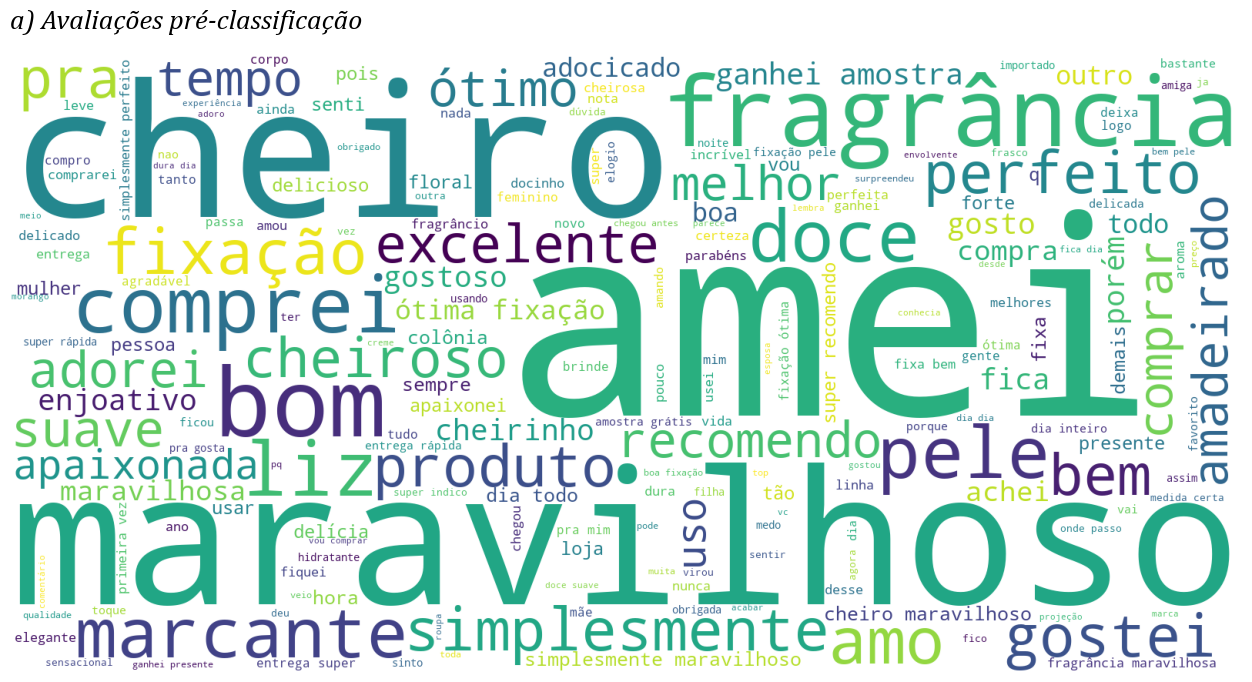

In [ ]:
wordcloud = WordCloud(stopwords = stop,
                      background_color='white', width=1600,                            
                      height=800).generate(all_content)

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
ax.set_title("a) Avaliações pré-classificação", fontsize=20, pad=20,fontname='Cambria', fontstyle='italic',loc='left' )
plt.imshow(wordcloud)

_**b)** Nuvem de palavras considerando apenas avaliações classificadas como **Positivas**_.

In [ ]:
positive = data.query("Score_sentimento > 0")

In [ ]:
pos_content = [word for sublist in positive["Full_text"] for word in sublist]
all_pos_content = ' '.join(pos_content)

In [ ]:
# Remoção de palavras que não são relevantes para essa análise
all_pos_content = all_pos_content.replace("perfume", "").replace("boticário", "")

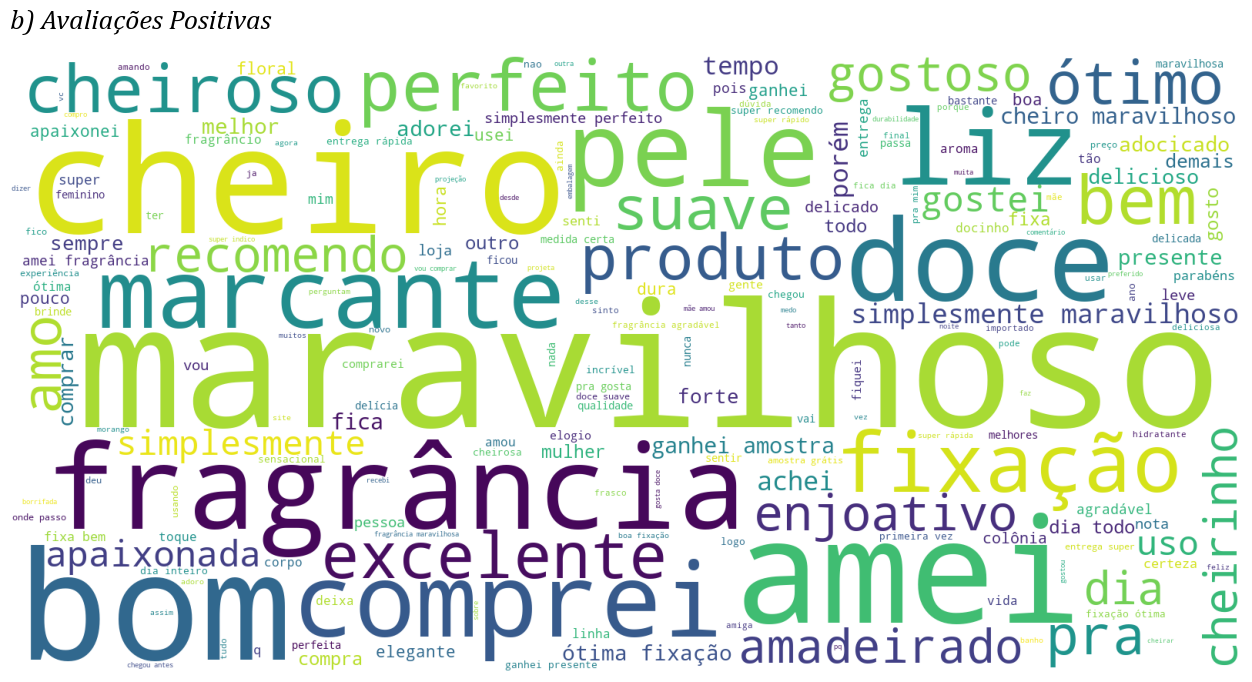

In [ ]:
wordcloud = WordCloud(stopwords = stop,
                      background_color='white', width=1600,                            
                      height=800).generate(all_pos_content)

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
ax.set_title("b) Avaliações Positivas", fontsize=20, pad=20,fontname='Cambria', fontstyle='italic',loc='left' )
plt.imshow(wordcloud)

_**c)** Nuvem de palavras considerando apenas avaliações classificadas como **Negativas**_.

In [ ]:
negative = data.query("Score_sentimento < 0")

In [ ]:
neg_content = [word for sublist in negative["Full_text"] for word in sublist]
all_neg_content = ' '.join(neg_content)

In [ ]:
# Remoção de palavras que não são relevantes para essa análise
all_neg_content = all_neg_content.replace("perfume", "").replace("boticário", "")

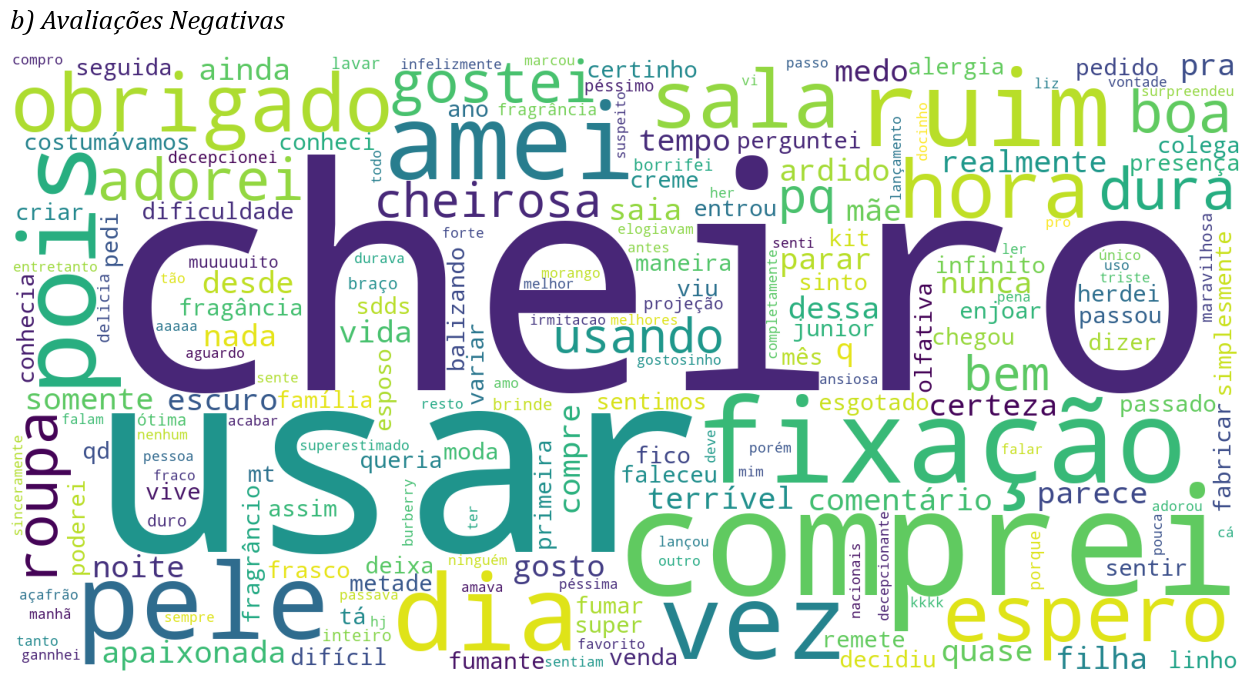

In [ ]:
wordcloud = WordCloud(stopwords = stop,
                      background_color='white', width=1600,                            
                      height=800).generate(all_neg_content)

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
ax.set_title("b) Avaliações Negativas", fontsize=20, pad=20,fontname='Cambria', fontstyle='italic',loc='left' )
plt.imshow(wordcloud)

_**c)** Nuvem de palavras considerando apenas avaliações classificadas como **Neutras**_.

In [ ]:
neutral = data.query("Score_sentimento == 0")

In [ ]:
neu_content = [word for sublist in neutral["Full_text"] for word in sublist]
all_neu_content = ' '.join(neu_content)

In [ ]:
# Remoção de palavras que não são relevantes para essa análise
all_neu_content = all_neu_content.replace("perfume", "").replace("boticário", "")

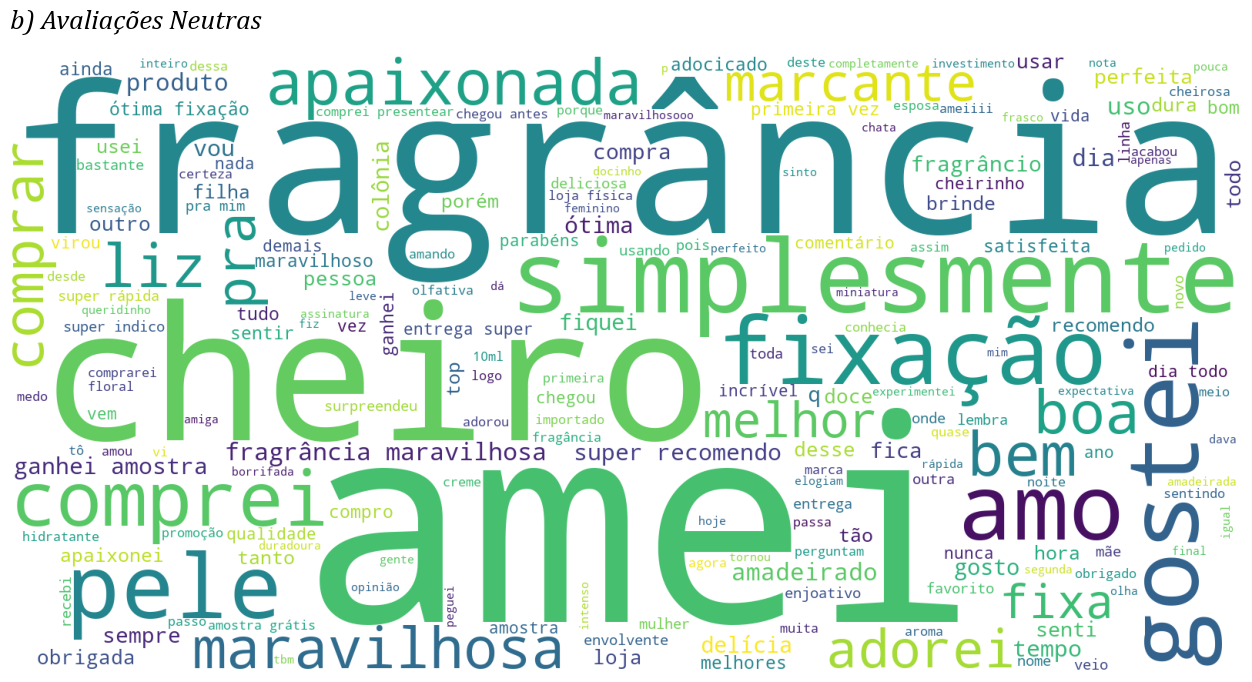

In [ ]:
wordcloud = WordCloud(stopwords = stop,
                      background_color='white', width=1600,                            
                      height=800).generate(all_neu_content)

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
ax.set_title("b) Avaliações Neutras", fontsize=20, pad=20,fontname='Cambria', fontstyle='italic',loc='left' )
plt.imshow(wordcloud)